# IXI Data Preparation

In [ ]:
import numpy as np
import nibabel as nib
import glob
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
import torch

In [36]:
# DATA_DIR_GEN_T1 = "D:\MedGAN\Dataset\IXI\T2\zipped"
DATA_DIR_GEN_T1 = "/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1"
DATA_DIR_GEN_T1_ZIPPED = os.path.join(DATA_DIR_GEN_T1, "zipped")
DATA_DIR_GEN_T1_IMAGE = os.path.join(DATA_DIR_GEN_T1, "T1/Images")

os.makedirs(DATA_DIR_GEN_T1_ZIPPED, exist_ok=True)
os.makedirs(DATA_DIR_GEN_T1_IMAGE, exist_ok=True)

DATA_DIR_GEN_T1_ZIPPED, DATA_DIR_GEN_T1_IMAGE

('/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/zipped',
 '/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1/Images')

In [17]:
t1_list = sorted(glob.glob(f'{DATA_DIR_GEN_T1_ZIPPED}/*T1.nii.gz'))

In [18]:
t1_list[:10]

['/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/zipped/IXI002-Guys-0828-T1.nii.gz',
 '/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/zipped/IXI012-HH-1211-T1.nii.gz',
 '/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/zipped/IXI013-HH-1212-T1.nii.gz',
 '/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/zipped/IXI014-HH-1236-T1.nii.gz',
 '/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/zipped/IXI015-HH-1258-T1.nii.gz',
 '/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/zipped/IXI016-Guys-0697-T1.nii.gz',
 '/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/zipped/IXI017-Guys-0698-T1.nii.gz',
 '/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/zipped/IXI019-Guys-0702-T1.nii.gz',
 '/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/zipped/IXI020-Guys-0700-T1.nii.gz',
 '/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/zipped/IXI021-Guys-0703-T1.nii.gz']

In [19]:
len(t1_list)

581

In [34]:
import os
import cv2
from PIL import Image 

In [21]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

In [22]:
# IXI Brain Parameters
image_size = 256
batch_size = 128
brain_slice = 155
stats = (0.5,), (0.5,)

In [37]:
DATA_DIR_GEN_T1_IMAGE

'/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1/Images'

In [51]:
scaler = StandardScaler()

NameError: name 'StandardScaler' is not defined

In [61]:
# Converting .nii.gz into a a npy file of brain slice 155 resized to 256x256 

for brainT1_path in t1_list:
    brainT1 = nib.load(brainT1_path).get_fdata()
    brainT1_resized_array = cv2.resize(brainT1[:,brain_slice,:], (256, 256), interpolation=cv2.INTER_LINEAR)
    # brainT1_resized_array = scaler.fit_transform(brainT1_resized_array.reshape(-1, brainT1_resized_array.shape[-1])).reshape(brainT1_resized_array.shape)
    # print(type(brainT1_resized_array), brainT1_resized_array.shape)
    file_tail = os.path.split(brainT1_path)[1][:-7]
    
    # brainT1_resized_path = os.path.join(DATA_DIR_GEN_T1_IMAGE,file_tail)
    brainT1_resized_path = DATA_DIR_GEN_T1_IMAGE + f'/{file_tail}'
    print(brainT1_resized_path)
    
    np.save(brainT1_resized_path, brainT1_resized_array)
    # print(np.max(brainT1_resized_array), np.min(brainT1_resized_array), np.mean(brainT1_resized_array))

    # im_t1 = Image.fromarray((brainT1_resized_array * 255).astype(np.uint8))
    # im_t1.save(brainT1_resized_path)

    print(f"Saved file: {brainT1_resized_path}.npy")


print("done")


/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1/Images/IXI002-Guys-0828-T1
Saved file: /Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1/Images/IXI002-Guys-0828-T1.npy
/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1/Images/IXI012-HH-1211-T1
Saved file: /Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1/Images/IXI012-HH-1211-T1.npy
/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1/Images/IXI013-HH-1212-T1
Saved file: /Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1/Images/IXI013-HH-1212-T1.npy
/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1/Images/IXI014-HH-1236-T1
Saved file: /Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1/Images/IXI014-HH-1236-T1.npy
/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1/Images/IXI015-HH-1258-T1
Saved file: /Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1/Images/IXI015-HH-1258-T1.npy
/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Datase

In [110]:
np_file = "/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1/Images/IXI002-Guys-0828-T1.npy"
np_brain = np.load(np_file)
np_brain.shape

(256, 256)

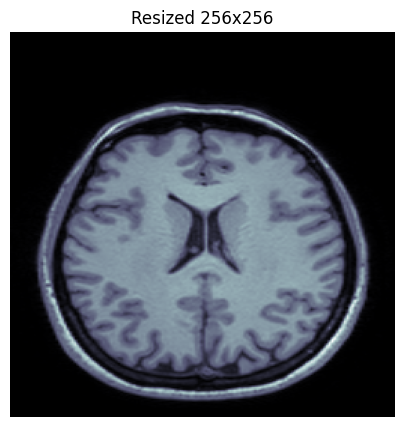

In [111]:
plt.figure(figsize=(5, 5))
plt.imshow(np_brain, cmap="bone")
plt.title("Resized 256x256")
plt.axis("off")
plt.show()

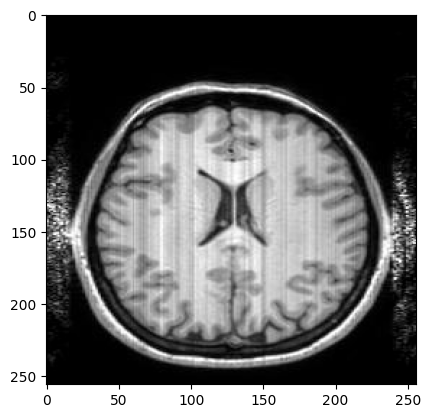

In [53]:
# Testing brain T1 jpeg image
img_file = "/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1/Images/IXI002-Guys-0828-T1.jpeg"
img = cv2.imread(img_file)
plt.imshow(img)

In [62]:
DATA_DIR_GEN_T1_IMAGE

'/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1/Images'

In [63]:
brainT1_image_list = os.listdir(DATA_DIR_GEN_T1_IMAGE)
len(brainT1_image_list)

581

In [64]:
import splitfolders  

input_t1 = "/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1"

output_t1 = "/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1_256_Data"

os.makedirs(output_t1, exist_ok=True)

input_files = [input_t1]
output_files = [output_t1]

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.

for input, output in zip(input_files, output_files):
    splitfolders.ratio(input, output=output, seed=42, ratio=(.75, .25), group_prefix=None) 

Copying files: 581 files [00:00, 1520.27 files/s]


In [69]:
GAN_TRAIN_T1 = "/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1_256_Data"

In [70]:
# IXI Brain Parameters
image_size = 256
batch_size = 128
brain_slice = 155
stats = (0.5,), (0.5,)

In [71]:
# gan_train_input = ImageFolder(
#     GAN_TRAIN_T1, 
#     transform=T.Compose([
#         # T.Resize(image_size),
#         # T.CenterCrop(image_size),
#         T.Grayscale(num_output_channels=1),
#         T.ToTensor(),
#         T.Normalize(*stats)
#     ]))

# gan_train_dl = DataLoader(
#     gan_train_input, batch_size, shuffle=True, 
#     num_workers=4, pin_memory=True
# )

In [76]:
GAN_TRAIN_T1

'/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1_256_Data'

In [77]:
os.listdir(GAN_TRAIN_T1)

['train', 'val']

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import numpy as np
import os

class NpyDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (str): Directory with .npy files.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        print(self.root_dir)
        self.file_list = [f for f in os.listdir(root_dir) if f.endswith(".npy")]
        self.transform = transform

    def __len__(self):
        return len(self.file_list)
    
    def return_file_list(self):
        return self.file_list

    def __getitem__(self, idx):
        file_path = os.path.join(self.root_dir, self.file_list[idx])
        
        # Load the .npy file (NumPy array)
        image = np.load(file_path)

        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)

        # # image_torch = torch.from_numpy(image)
        # image = T.ToPILImage()(image)

        if self.transform:
            for transform_func in self.transform:
                image = transform_func(image)

        
        return image


In [173]:
import numpy as np


def normalise(img):
    # Example input image
    img_max = np.max(img)
    img2 = img * img_max # Simulating an MRI image with values up to 745.71

    # Normalize from 0 to 255
    img2_normalized = ((img2 - np.min(img2)) / (np.max(img2) - np.min(img2))) * 255

    # Convert to uint8 (8-bit image)
    img2_normalized = img2_normalized.astype(np.uint8)

    return img2_normalized

In [174]:
transformations = [
    normalise
]

In [175]:
# Create dataset
gan_train_input = NpyDataset(os.path.join(GAN_TRAIN_T1,"train/Images"), transform=transformations)
gan_val_input = NpyDataset(os.path.join(GAN_TRAIN_T1,"val/Images"), transform=transformations)

/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1_256_Data/train/Images
/Users/eyash.p24/Desktop/MUJ/PBL5/PBL 5/Dataset/IXI/IXI-T1/T1_256_Data/val/Images


In [176]:
len(gan_train_input), len(gan_val_input)

(435, 146)

In [177]:
# Create DataLoader
gan_train_dl = DataLoader(
    gan_train_input, batch_size, shuffle=True
)

# # Example: Get a batch
images = next(iter(gan_train_dl))
print(images.shape)  # Expected: (32, 1, H, W)

torch.Size([128, 256, 256, 1])


In [178]:
for img in gan_train_input:
    print(img.shape)
    print(type(img))
    break

(256, 256, 1)
<class 'numpy.ndarray'>


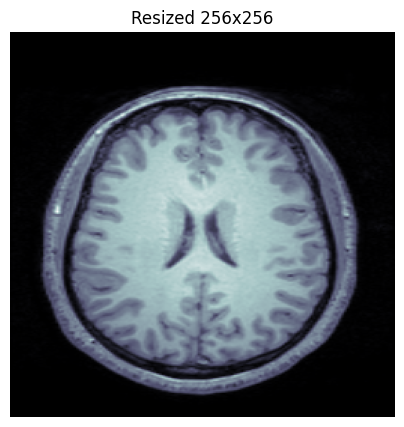

In [180]:
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap="bone")
plt.title("Resized 256x256")
plt.axis("off")
plt.show()